# Initial probe of how many share by experiment arm


Consider this a data check:
- is the number of completions consistent across experiment arms?
- what is the overall share rate?
- how does the share rate differ by experiment arm?

In [3]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# This data was filtered to responses that were considered completed (included attention check at the end)
# Downloaded from Qualtrics 11-22-2022
data_filepath = '../data/amazon-purchases-survey-v0-completed-11-22-2022-raw.csv'

In [7]:
pd.set_option('max_columns', None)

df = pd.read_csv(data_filepath)
print('shape:', df.shape)
print('all fields:', df.columns)
df.head(2)

shape: (1417, 93)
all fields: Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q43_Id', 'Q43_Name', 'Q43_Size',
       'Q43_Type', 'Q-requirements-1', 'Q-requirements-2', 'intro-1',
       'intro-2', 'Q-prolific', 'Q-prolific-mturk', 'Q-mturk-account',
       'Q-accnt-attn-check', 'download', 'download-fail-expl',
       'download-fail-screen_Id', 'download-fail-screen_Name',
       'download-fail-screen_Size', 'download-fail-screen_Type', 'q-demos-age',
       'Q-demos-hispanic', 'Q-demos-race', 'Q-demos-education',
       'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
       'Q-demos-state', 'Q-amazon-use-howmany', 'Q-amazon-use-hh-size',
       'Q-amazon-use-how-oft', 'Q-substance-use_1', 'Q-substanc

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q43_Id,Q43_Name,Q43_Size,Q43_Type,Q-requirements-1,Q-requirements-2,intro-1,intro-2,Q-prolific,Q-prolific-mturk,Q-mturk-account,Q-accnt-attn-check,download,download-fail-expl,download-fail-screen_Id,download-fail-screen_Name,download-fail-screen_Size,download-fail-screen_Type,q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,Q-amazon-use-hh-size,Q-amazon-use-how-oft,Q-substance-use_1,Q-substance-use_2,Q-substance-use_3,Q-personal_1,Q-personal_2,Q-life-changes,Q-data-download,Q-share-error-1,Q-share-error-2-a,Q-share-error-2-b,Q-share-error-2-c0,Q-share-error-2-c,share-error-3,share-error-4_Id,share-error-4_Name,share-error-4_Size,share-error-4_Type,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,Q-data-value-05,Q-data-value-20,Q-data-value-50,Q-data-value-100,Q-data-value-any,Q-data-value-any_1_TEXT,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Q-attn-check,Q-comments,SurveyID,ResponseID,FQID,API_TOKEN,BATCH,RandomID,PROLIFIC_PID,STUDY_ID,SESSION_ID,showdata,incentive,consent
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Hidden file upload question [QID47-UploadedFil...,Do you have an active Amazon account?,Have you used your Amazon account to make purc...,Introduction This survey is part of a MIT s...,Survey questions and data collection We will ...,What is your Prolific ID?,Do you also complete surveys (or HITs) using A...,Is the Amazon.com account that you use to comp...,"Since you have different Amazon accounts, will...",Start the data download process Go to the f...,Please explain below why you were not able to ...,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,Upload a screenshot displaying the issue here....,What is your age group?,"Are you of Spanish, Hispanic, or Latino origin?",Choose one or more races that you consider you...,What is the highest level of education you hav...,What was your total household income before ta...,How do you describe yourself?,Which best describes your sexual orientation?,"50 States, D.C. and Puerto Rico",How many people do you share your Amazon accou...,"How many people are in your ""household""?",How often do you (+ anyone you share your acco...,Are any of the following the case for: You or...,Are any of the following the case for: You or...,Are any of the following the case for: You or...,Are any of the following the case for: You or...,Are any of the following the case for: You or...,"In 2021 did you, or someone you share your Ama...",Amazon data Go back to the Amazon page wher...,What was the issue?,Do you have an active Amazon account that you ...,Can you log into that Amazon account during th...,Do you also complete surveys or HITs on Amazon...,Is the Amazon.com account that you use to comp...,Please describe the issue here.,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Please upload a screenshot displaying the issu...,Click to insert the file from Amazon below. ...,Click to insert the file from Amazon below. ...,Click to insert the file from Amazon below. ...,Click to insert the file from Amazon below. ...,Click to insert the file from Amazon 

In [8]:
# Drop the Qualtrics metadata
df = df.drop([0,1])

In [13]:
df[['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50', 'showdata', 'incentive']].head()

,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,showdata,incentive
2,NaN,NaN,NaN,NaN,1,false,bonus-50
3,NaN,NaN,0,NaN,NaN,false,bonus-05
4,NaN,NaN,1,NaN,NaN,false,bonus-05
5,NaN,NaN,NaN,NaN,1,false,bonus-50
6,1,NaN,NaN,NaN,NaN,true,control


In [31]:
# add boolean indicating share
df['share'] = df[
    ['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50']
].astype(float).fillna(0).sum(axis=1)
df[['Q-control', 'Q-altruism', 'Q-bonus-05', 'Q-bonus-20', 'Q-bonus-50', 'showdata', 'incentive', 'share']].head()

,Q-control,Q-altruism,Q-bonus-05,Q-bonus-20,Q-bonus-50,showdata,incentive,share
2,NaN,NaN,NaN,NaN,1,false,bonus-50,1.0
3,NaN,NaN,0,NaN,NaN,false,bonus-05,0.0
4,NaN,NaN,1,NaN,NaN,false,bonus-05,1.0
5,NaN,NaN,NaN,NaN,1,false,bonus-50,1.0
6,1,NaN,NaN,NaN,NaN,true,control,1.0


In [32]:
# make a df with just the columns we care about
share_df = df[['showdata', 'incentive', 'share']]
share_df.head()

,showdata,incentive,share
2,false,bonus-50,1.0
3,false,bonus-05,0.0
4,false,bonus-05,1.0
5,false,bonus-50,1.0
6,true,control,1.0


Aggregate the data

Make a table:

```
incentive, showdata, count, share rate
```

In [64]:
agg_share_df = share_df.groupby(['incentive','showdata'])['share'].agg(['count','mean']).round(3).reset_index()
agg_share_df

,incentive,showdata,count,mean
0,altruism,false,146,0.760
1,altruism,true,155,0.852
2,bonus-05,false,148,0.676
3,bonus-05,true,140,0.807
4,bonus-20,false,141,0.794
5,bonus-20,true,136,0.875
6,bonus-50,false,140,0.886
7,bonus-50,true,136,0.882
8,control,false,131,0.756
9,control,true,142,0.852


In [74]:
# overall
overall_count = agg_share_df['count'].sum()
overall_share_rate = share_df['share'].mean().round(3)

print('overall count: %s' % overall_count)
print('overall share rate: %s' % overall_share_rate)

overall count: 1415
overall share rate: 0.813


In [65]:
pdf = agg_share_df.set_index('incentive')

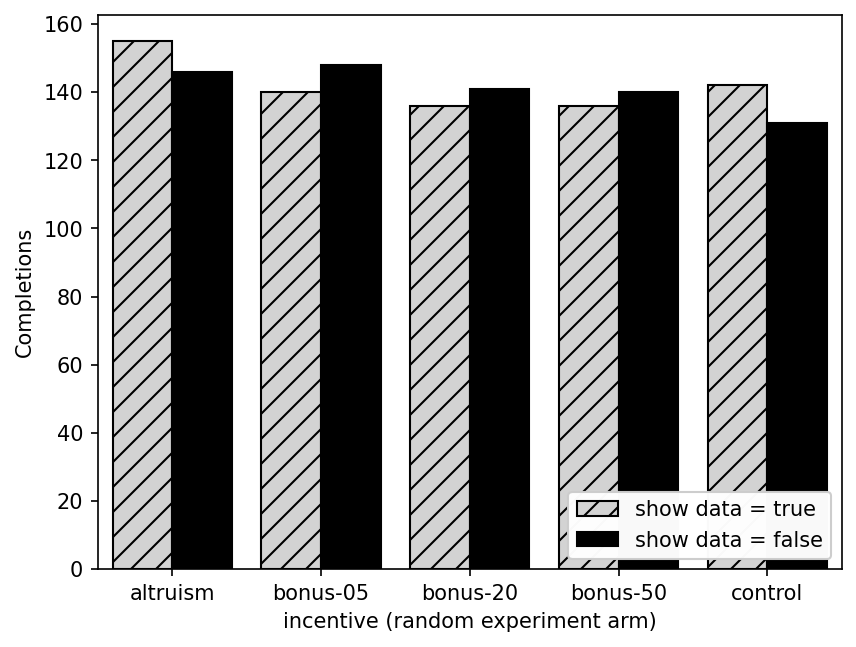

In [71]:
# plot count
fig,ax = plt.subplots(1,1, dpi=150)

width = 0.4
pdf = agg_share_df
(pdf[pdf['showdata']=='true']['count']
 .plot(
    kind='bar', color='lightgray', edgecolor='black', hatch='//',
    label='show data = true',
    ax=ax, width=width, position=1
))
(pdf[pdf['showdata']=='false']['count']
 .plot(
    kind='bar', color='black', 
    edgecolor='black', 
    label='show data = false',
    ax=ax, width=width, position=0)
)
ax.set_ylabel('Completions')
ax.set_xlabel('incentive (random experiment arm)')
ax.set_xlim([-0.5,4.5])
ax.legend(facecolor='white', framealpha=0.98, loc='lower right')
# ax.set_ylim([0,59])
_ = ax.set_xticklabels(pdf[pdf['showdata']=='true']['incentive'], rotation=0)

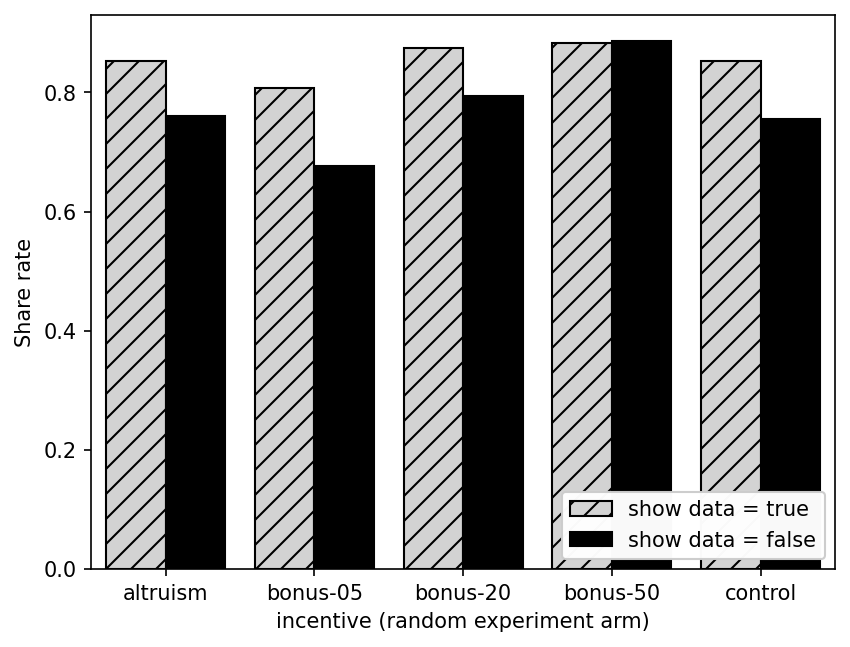

In [70]:
# plot count
fig,ax = plt.subplots(1,1, dpi=150)

width = 0.4
pdf = agg_share_df
(pdf[pdf['showdata']=='true']['mean']
 .plot(
    kind='bar', color='lightgray', edgecolor='black', hatch='//',
    label='show data = true',
    ax=ax, width=width, position=1
))
(pdf[pdf['showdata']=='false']['mean']
 .plot(
    kind='bar', color='black', 
    edgecolor='black', 
    label='show data = false',
    ax=ax, width=width, position=0)
)
ax.set_ylabel('Share rate')
ax.set_xlabel('incentive (random experiment arm)')
ax.set_xlim([-0.5,4.5])
ax.legend(facecolor='white', framealpha=0.98, loc='lower right')
# ax.set_ylim([0,59])
_ = ax.set_xticklabels(pdf[pdf['showdata']=='true']['incentive'], rotation=0)